## Initial testing on Oracle instance at NCSA
* indexing is with DiaObjectLast table
* we have both SSD and spinning disks on the instance (tablespaces LSST_ALERTS_SSD and LSST_ALERTS_SPIN), default tablespace is LSST_ALERTS_SPIN
* `ap_proto` is running on lsst-dev machine which is typically not overloaded

In [2]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

import plots

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']

## First test with 5x5 tiles

* Tables created in default tablespace (which was supposed to be LSST_ALERTS_SSD but in reality was LSST_ALERTS_SPIN).
* 5x5 tiling
* `ap_proto` CPU consumption was very low

Timings from `dm-14712-oracle-hdd-5x5.log.gz`, initial 395 visits are missing from a log:
```
2018-06-01 13:26:14,376 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-06-01 13:26:14,376 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-06-01 13:26:14,377 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-06-01 13:26:14,377 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-06-01 13:26:14,377 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-06-01 13:26:14,377 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-06-01 13:26:14,377 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-06-01 13:26:14,377 [INFO] lsst.l1dbproto.l1db:     schema_file: /home/salnikov/l1dbproto/data/l1db-schema.yaml
2018-06-01 13:26:14,377 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: /home/salnikov/l1dbproto/data/l1db-schema-extra.yaml
2018-06-01 13:26:14,377 [INFO] lsst.l1dbproto.l1db:     column_map: /home/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-06-01 13:26:15,429 [INFO] lsst.l1dbproto.l1db: lastVisit: visitId: 395 visitTime: 2020-01-01 21:55:30 (<class 'datetime.datetime'>)
2018-06-01 13:26:16,697 [INFO] ap_proto: Will divide FOV into 5x5 regions
2018-06-01 13:26:16,698 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-06-01 13:26:17,570 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-06-01 13:26:17,571 [INFO] ap_proto: lastSourceId: 5963975
2018-06-01 13:26:17,571 [INFO] ap_proto: +++ Start processing visit 396 at 2020-01-01 21:56:15
...
2018-06-01 14:31:05,264 [INFO] ap_proto: --- Finished processing visit 1395, time: real=4.325 user=1.300 sys=4.003
[next batch]
2018-06-08 18:46:47,463 [INFO] ap_proto: +++ Start processing visit 1396 at 2020-01-03 00:26:15
...
2018-06-08 20:05:27,048 [INFO] ap_proto: --- Finished processing visit 2395, time: real=3.626 user=1.473 sys=4.519
[next batch]
2018-06-10 01:10:51,765 [INFO] ap_proto: +++ Start processing visit 2396 at 2020-01-04 02:56:15
...
2018-06-10 05:01:11,154 [INFO] ap_proto: --- Finished processing visit 4395, time: real=10.452 user=1.644 sys=4.203
[next batch]
2018-06-10 10:19:04,888 [INFO] ap_proto: +++ Start processing visit 4396 at 2020-01-06 21:56:15
...
2018-06-11 03:59:39,989 [INFO] ap_proto: --- Finished processing visit 9395, time: real=16.030 user=1.418 sys=3.779
```

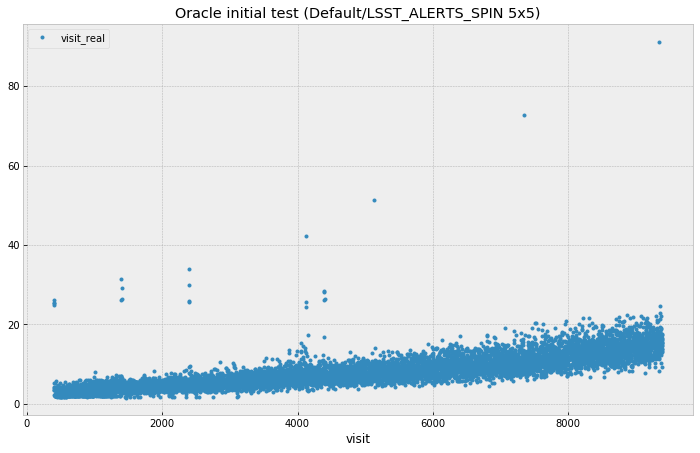

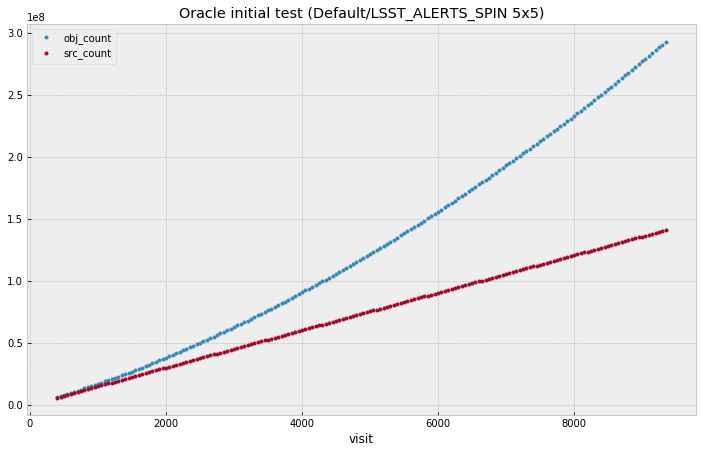

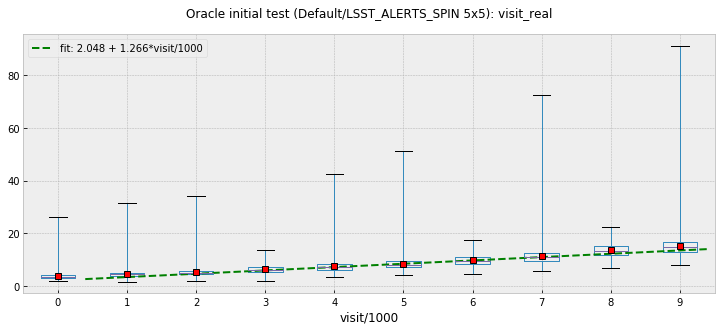

In [2]:
ds = plots.do_plots("data/dm-14712-oracle-hdd-5x5.csv.gz", "Oracle initial test (Default/LSST_ALERTS_SPIN 5x5)",
                    bin=1000, filter_count=True)

## Single process test with SSD
* here we switch to explicit SSD tablespace
* No tiling to see how fast single process runs
* Detailed timing was not enabled for this run

Relevant pieces of `dm-14712-oracle-ssd-1x1.log.gz` log file:
```
2018-06-11 17:13:49,403 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-06-11 17:13:49,403 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-06-11 17:13:49,403 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-06-11 17:13:49,403 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-06-11 17:13:49,404 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-06-11 17:13:49,404 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-06-11 17:13:49,404 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-06-11 17:13:49,404 [INFO] lsst.l1dbproto.l1db:     schema_file: /home/salnikov/l1dbproto/data/l1db-schema.yaml
2018-06-11 17:13:49,404 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: /home/salnikov/l1dbproto/data/l1db-schema-extra.yaml
2018-06-11 17:13:49,404 [INFO] lsst.l1dbproto.l1db:     column_map: /home/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-06-11 17:13:51,535 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-06-11 17:13:52,272 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-06-11 17:13:52,273 [INFO] ap_proto: lastSourceId: 0
2018-06-11 17:13:52,273 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-10 03:00:00
...
2018-06-11 17:13:52,273 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-10 03:00:00
2018-06-11 20:46:56,701 [INFO] ap_proto: --- Finished processing visit 900, time: real=19.175 user=14.395 sys=4.008
...
2018-06-11 21:03:34,577 [INFO] ap_proto: +++ Start processing visit 901 at 2020-01-11 04:15:00
2018-06-12 16:42:15,774 [INFO] ap_proto: --- Finished processing visit 3491, time: real=31.298 user=25.031 sys=4.046
...
2018-06-12 17:01:10,255 [INFO] ap_proto: +++ Start processing visit 3492 at 2020-01-14 20:38:15
2018-06-12 22:33:58,049 [INFO] ap_proto: --- Finished processing visit 4077, time: real=29.421 user=24.288 sys=4.169
```

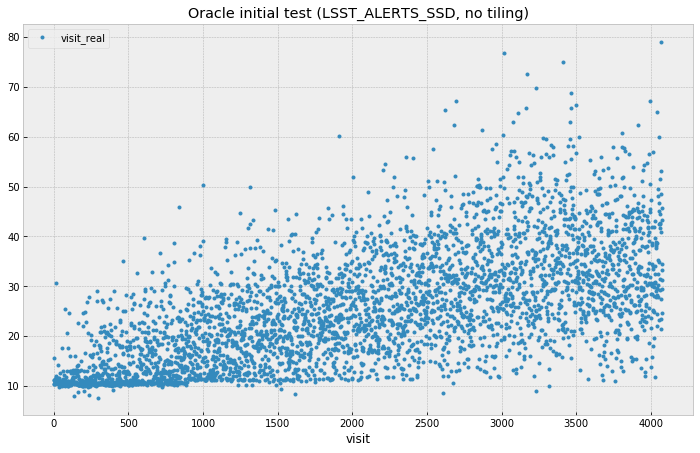

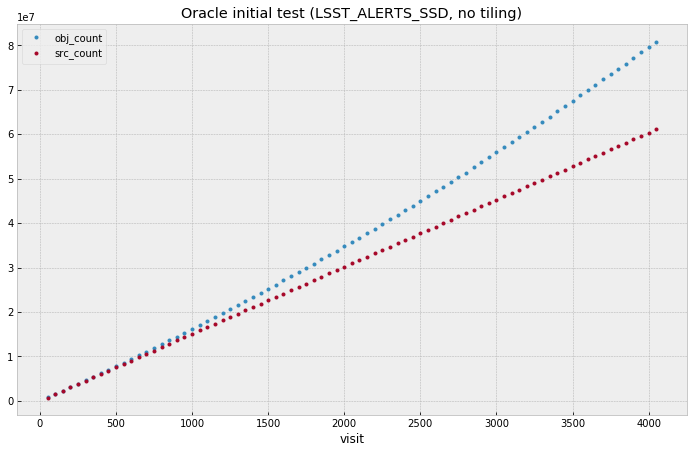

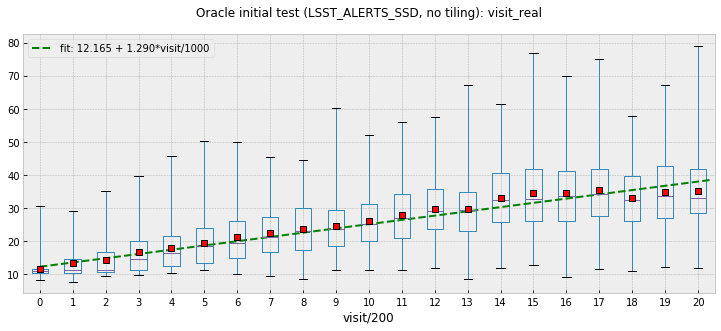

In [3]:
ds = plots.do_plots("data/dm-14712-oracle-ssd-1x1.csv.gz", "Oracle initial test (LSST_ALERTS_SSD, no tiling)",
                    bin=200, filter_count=True)

## 5x5 tiles on SSD
* switching to 5x5 tiles on LSST_ALERTS_SSD tablespace
* again CPU consumption is teribly low

Relevant pieces from `dm-14712-oracle-ssd-5x5.log.gz`:
```
2018-06-13 00:57:24,735 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-06-13 00:57:24,735 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-06-13 00:57:24,735 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     schema_file: /home/salnikov/l1dbproto/data/l1db-schema.yaml
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: /home/salnikov/l1dbproto/data/l1db-schema-extra.yaml
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     column_map: /home/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     schema prefix: X15_
2018-06-13 00:57:25,766 [INFO] ap_proto: Will divide FOV into 5x5 regions
2018-06-13 00:57:25,766 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-06-13 00:57:26,623 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-06-13 00:57:26,624 [INFO] ap_proto: lastSourceId: 0
2018-06-13 00:57:26,624 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-10 03:00:00
2018-06-13 06:21:39,848 [INFO] ap_proto: --- Finished processing visit 1000, time: real=28.060 user=1.538 sys=4.244
...
2018-06-13 08:42:31,842 [INFO] ap_proto: +++ Start processing visit 1001 at 2020-01-11 05:30:00
2018-06-13 20:18:05,271 [INFO] ap_proto: --- Finished processing visit 2000, time: real=54.982 user=1.422 sys=3.906
```

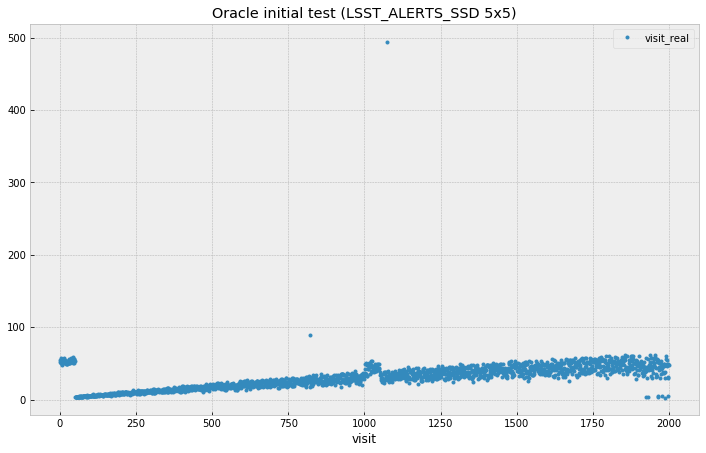

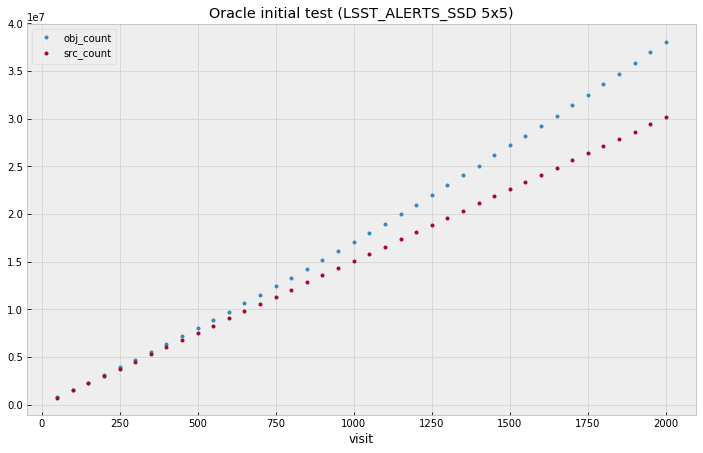

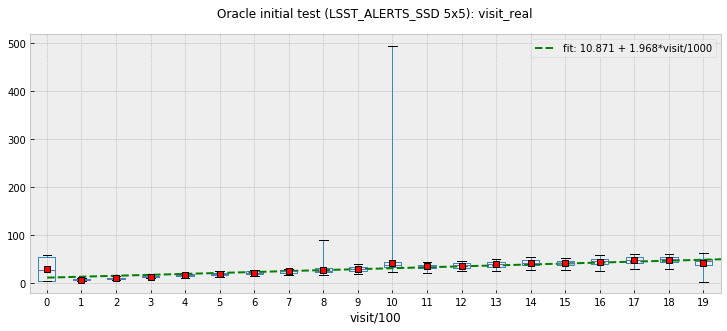

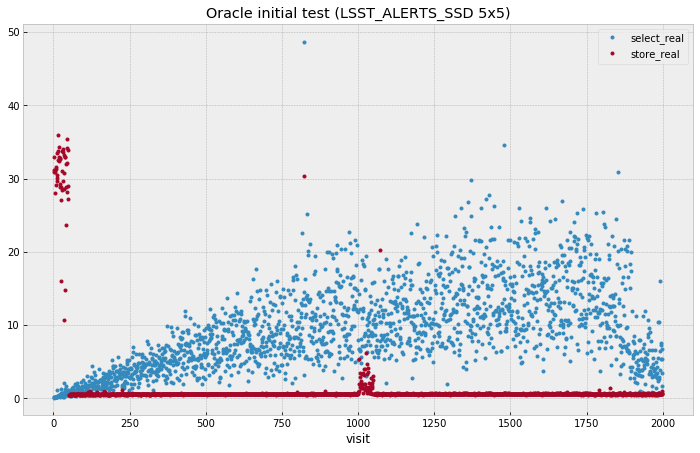

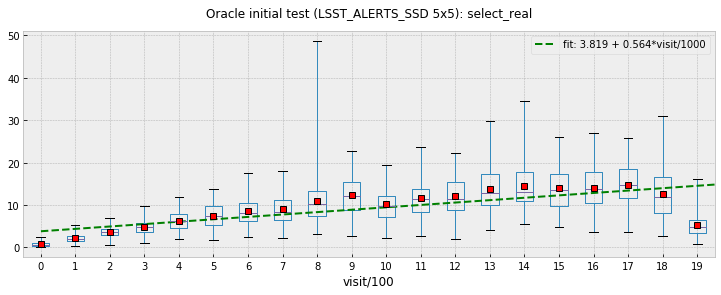

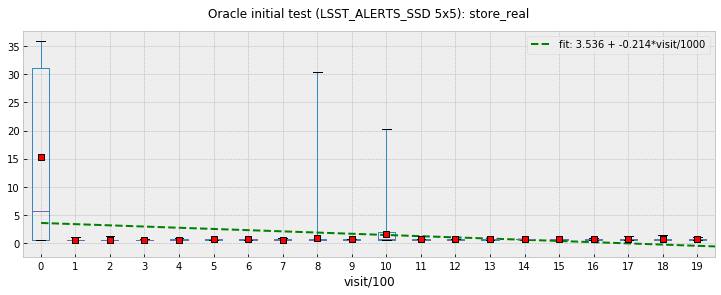

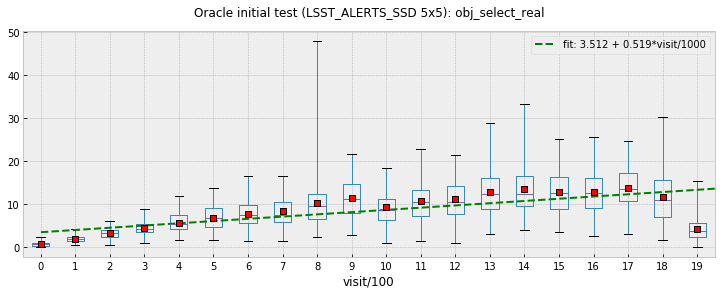

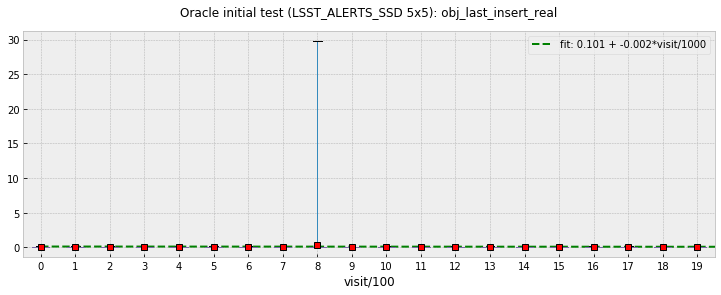

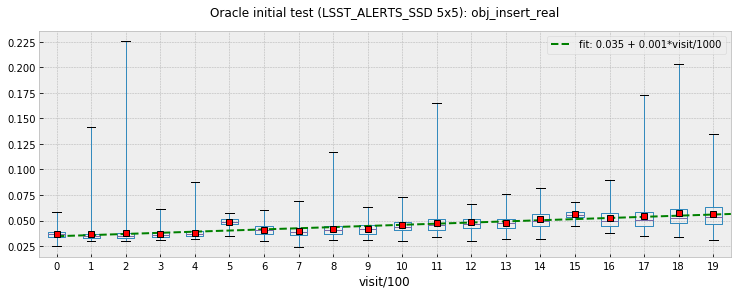

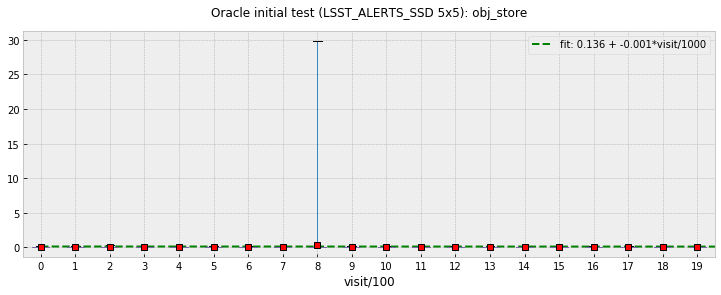

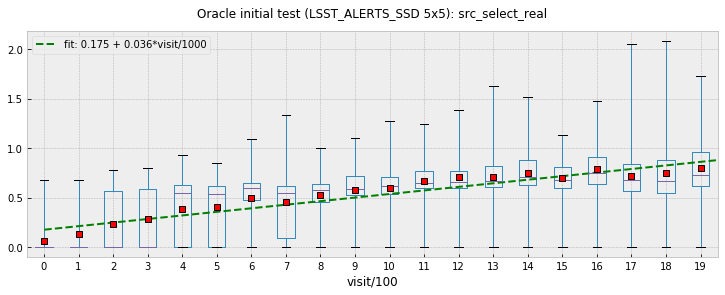

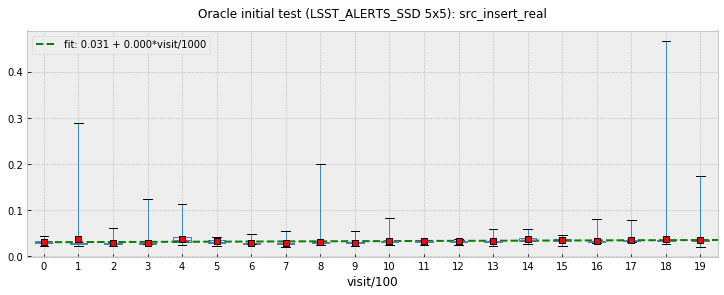

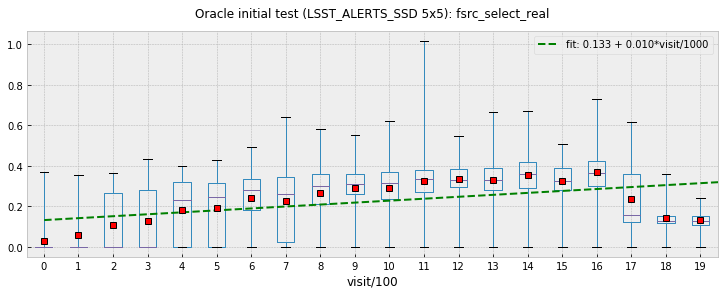

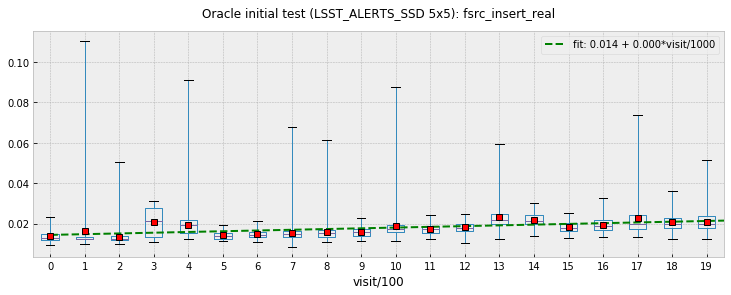

In [4]:
csv = "data/dm-14712-oracle-ssd-5x5.csv.gz"
title = "Oracle initial test (LSST_ALERTS_SSD 5x5)"
ds = plots.do_plots(csv, title, bin=100, filter_count=True)
ds = plots.do_plots_all(csv, title, bin=100, filter_count=True, plots=all_plots)

## 5x5 test on spinning disks
* switching back to LSST_ALERTS_SPIN (explicit)

Relevant pieces of `dm-14712-oracle-spin-5x5.log.gz`:
```
2018-06-14 00:41:38,220 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-06-14 00:41:38,220 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-06-14 00:41:38,220 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-06-14 00:41:38,220 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-06-14 00:41:38,220 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-06-14 00:41:38,220 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-06-14 00:41:38,221 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-06-14 00:41:38,221 [INFO] lsst.l1dbproto.l1db:     schema_file: /home/salnikov/l1dbproto/data/l1db-schema.yaml
2018-06-14 00:41:38,221 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: /home/salnikov/l1dbproto/data/l1db-schema-extra.yaml
2018-06-14 00:41:38,221 [INFO] lsst.l1dbproto.l1db:     column_map: /home/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-06-14 00:41:38,221 [INFO] lsst.l1dbproto.l1db:     schema prefix: X2_
2018-06-14 00:41:41,595 [INFO] ap_proto: Will divide FOV into 5x5 regions
2018-06-14 00:41:41,595 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-06-14 00:41:42,492 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-06-14 00:41:42,493 [INFO] ap_proto: lastSourceId: 0
2018-06-14 00:41:42,493 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-10 03:00:00
2018-06-14 06:24:45,017 [INFO] ap_proto: --- Finished processing visit 1000, time: real=35.049 user=1.627 sys=4.321
...
2018-06-14 12:26:31,361 [INFO] ap_proto: +++ Start processing visit 1001 at 2020-01-11 05:30:00
2018-06-14 21:48:41,599 [INFO] ap_proto: --- Finished processing visit 2000, time: real=7.413 user=1.517 sys=4.181
...
2018-06-15 11:46:55,974 [INFO] ap_proto: +++ Start processing visit 2001 at 2020-01-12 22:00:00
2018-06-15 13:32:08,490 [INFO] ap_proto: --- Finished processing visit 3000, time: real=13.262 user=1.556 sys=4.115
...
2018-06-15 15:18:16,559 [INFO] ap_proto: +++ Start processing visit 3001 at 2020-01-14 00:30:00
2018-06-15 23:24:45,435 [INFO] ap_proto: --- Finished processing visit 6000, time: real=148.191 user=1.636 sys=4.801
...
2018-06-16 01:02:28,391 [INFO] ap_proto: +++ Start processing visit 6001 at 2020-01-17 22:00:00
2018-06-17 15:38:18,829 [INFO] ap_proto: --- Finished processing visit 14000, time: real=70.610 user=1.713 sys=4.351
```

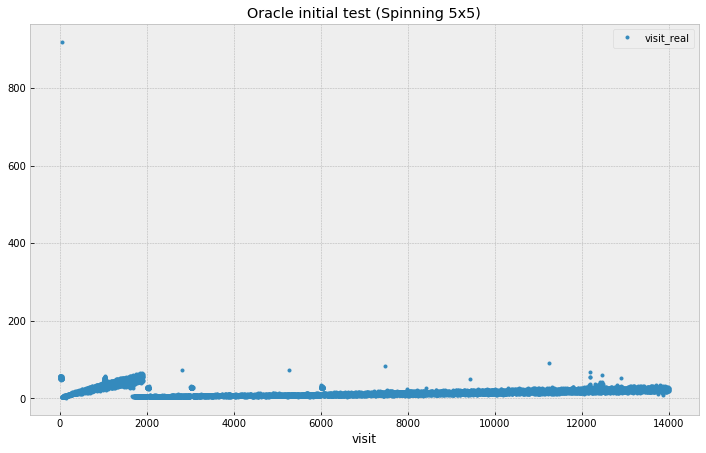

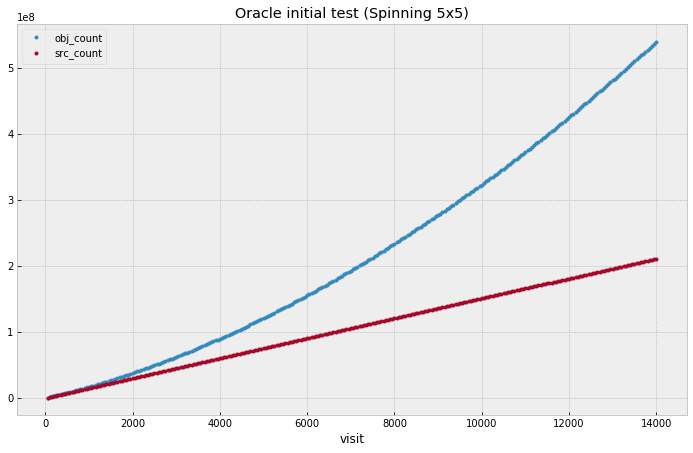

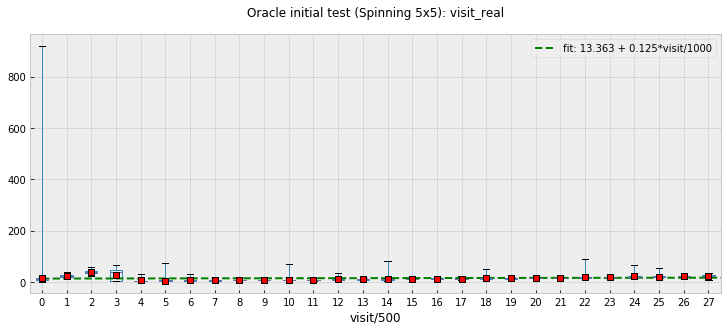

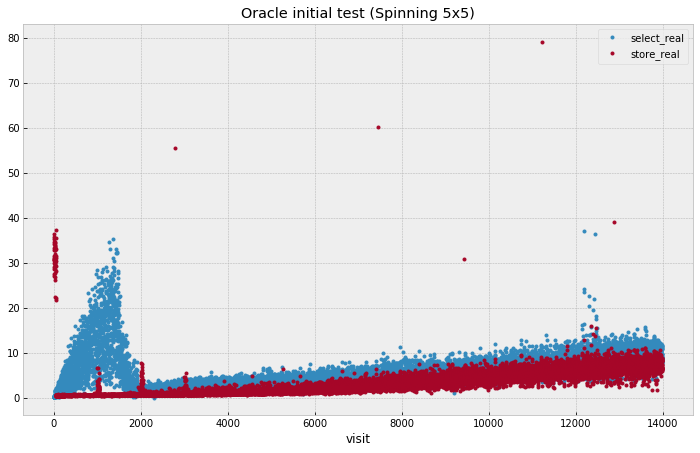

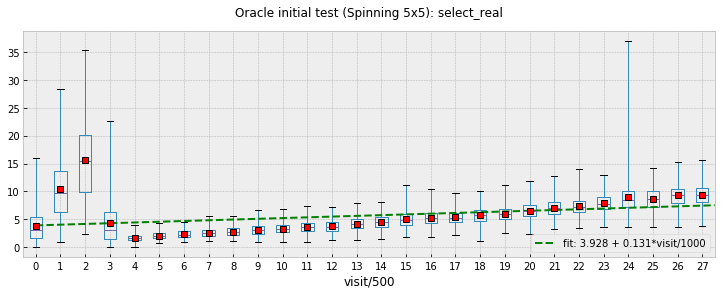

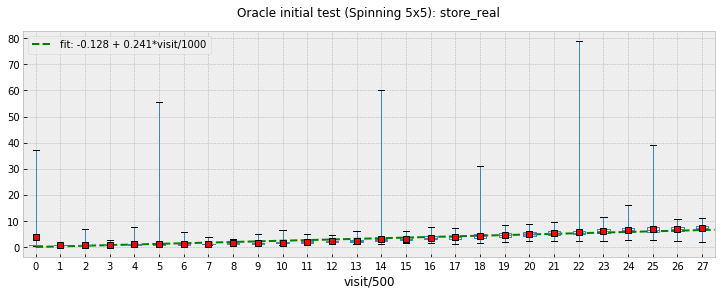

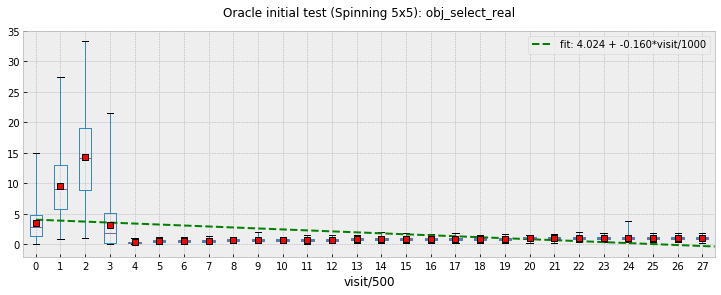

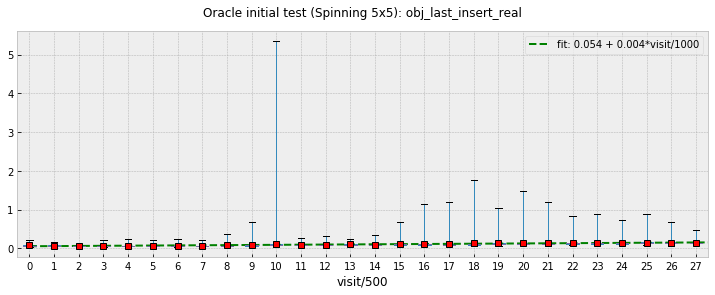

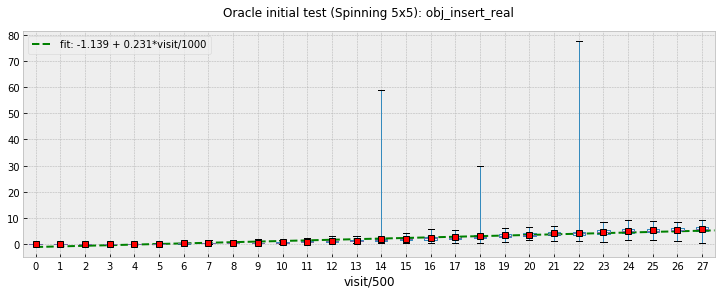

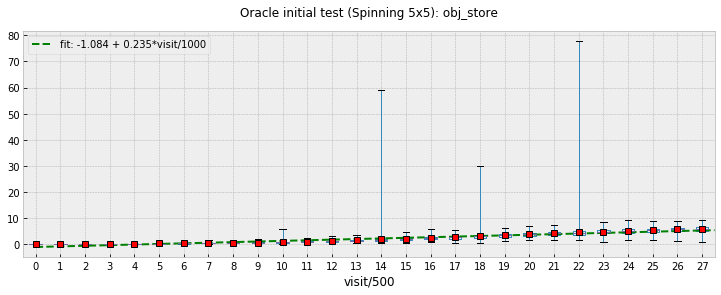

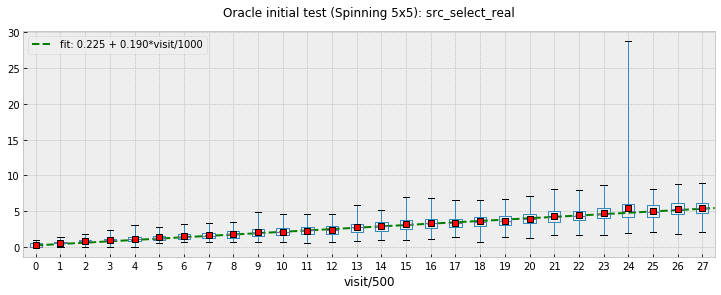

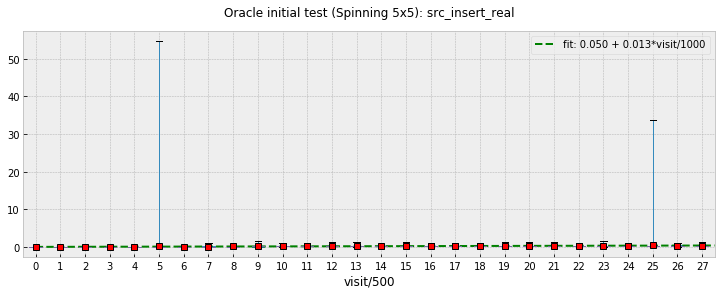

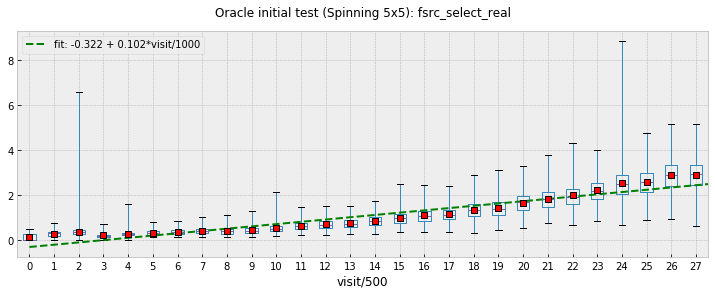

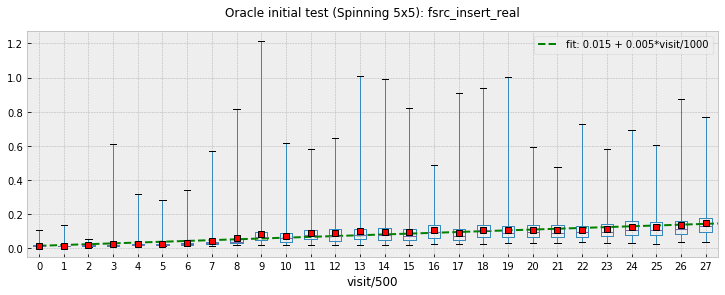

In [5]:
csv = "data/dm-14712-oracle-spin-5x5.csv.gz"
title = "Oracle initial test (Spinning 5x5)"
ds = plots.do_plots(csv, title, bin=500, filter_count=True)
ds = plots.do_plots_all(csv, title, bin=500, filter_count=True, plots=all_plots)   

## Continue SSD testing with 5x5 tiling

- This includes 2000 visits from the above test
- Main improvement here comes from adding all DiaObjectLast columns used in SELECT to the spacial index so that all data is satisfied from index without additional reads from other segments  

Logs are `dm-14712-oracle-ssd-5x5.log.gz` (same as above), `dm-14712-oracle-ssd-5x5-2.log.gz`, `dm-14712-oracle-ssd-5x5-3.log.gz`, and `dm-14712-oracle-ssd-5x5-4.log.gz`:
```
2018-06-13 00:57:24,735 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-06-13 00:57:24,735 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-06-13 00:57:24,735 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     schema_file: /home/salnikov/l1dbproto/data/l1db-schema.yaml
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: /home/salnikov/l1dbproto/data/l1db-schema-extra.yaml
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     column_map: /home/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-06-13 00:57:24,736 [INFO] lsst.l1dbproto.l1db:     schema prefix: X15_
2018-06-13 00:57:25,766 [INFO] ap_proto: Will divide FOV into 5x5 regions
2018-06-13 00:57:25,766 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-06-13 00:57:26,623 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-06-13 00:57:26,624 [INFO] ap_proto: lastSourceId: 0
2018-06-13 00:57:26,624 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-10 03:00:00
2018-06-13 06:21:39,848 [INFO] ap_proto: --- Finished processing visit 1000, time: real=28.060 user=1.538 sys=4.244
...
2018-06-13 08:42:31,842 [INFO] ap_proto: +++ Start processing visit 1001 at 2020-01-11 05:30:00
2018-06-13 20:18:05,271 [INFO] ap_proto: --- Finished processing visit 2000, time: real=54.982 user=1.422 sys=3.906
...
2018-06-21 12:52:21,359 [INFO] ap_proto: +++ Start processing visit 2001 at 2020-01-12 22:00:00
2018-06-21 14:27:39,434 [INFO] ap_proto: --- Finished processing visit 3000, time: real=9.765 user=1.361 sys=3.877
...
2018-06-21 14:28:01,862 [INFO] ap_proto: +++ Start processing visit 3001 at 2020-01-14 00:30:00
2018-06-21 16:51:51,257 [INFO] ap_proto: --- Finished processing visit 4308, time: real=3.628 user=1.236 sys=3.733
...
2018-06-21 17:47:45,583 [INFO] ap_proto: +++ Start processing visit 4309 at 2020-01-15 20:51:00
2018-06-21 18:24:33,164 [INFO] ap_proto: --- Finished processing visit 4508, time: real=5.442 user=1.240 sys=2.825
...
2018-06-21 18:53:03,204 [INFO] ap_proto: +++ Start processing visit 4509 at 2020-01-15 23:21:00
2018-06-22 18:53:08,661 [INFO] ap_proto: --- Finished processing visit 13962, time: real=8.775 user=1.319 sys=2.732
...
2018-06-22 19:51:36,996 [INFO] ap_proto: +++ Start processing visit 13963 at 2020-01-27 21:31:30
2018-06-24 11:22:39,963 [INFO] ap_proto: --- Finished processing visit 23962, time: real=16.866 user=1.178 sys=2.819
...
2018-06-24 11:51:41,550 [INFO] ap_proto: +++ Start processing visit 23963 at 2020-02-09 02:31:30
2018-06-25 10:24:40,193 [INFO] ap_proto: --- Finished processing visit 28308, time: real=16.808 user=1.161 sys=2.856
...
2018-06-26 10:59:06,788 [INFO] ap_proto: +++ Start processing visit 28309 at 2020-02-14 20:51:00
2018-06-27 11:31:44,297 [INFO] ap_proto: --- Finished processing visit 32360, time: real=16.245 user=1.237 sys=2.815
...
2018-06-27 11:32:52,610 [INFO] ap_proto: +++ Start processing visit 32361 at 2020-02-19 21:30:00
2018-06-28 13:02:00,132 [INFO] ap_proto: --- Finished processing visit 36103, time: real=24.585 user=1.242 sys=2.823
```


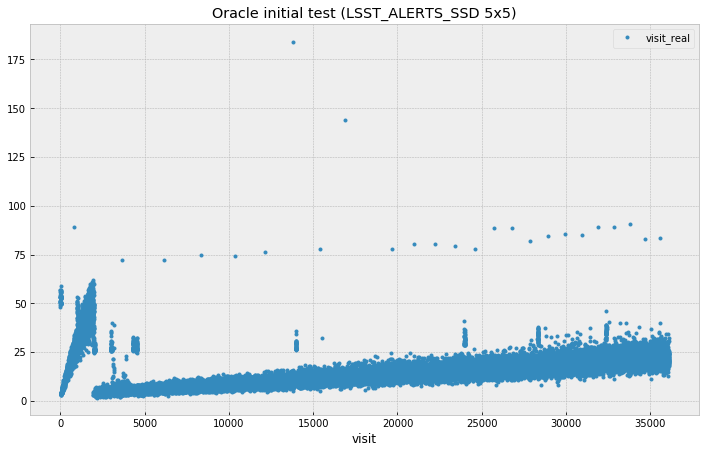

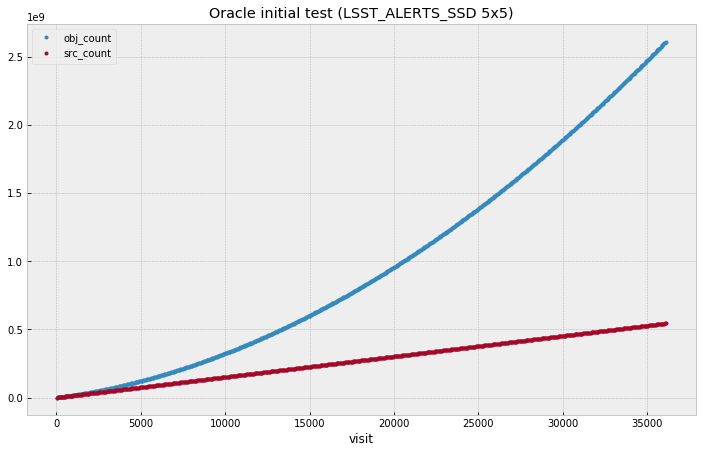

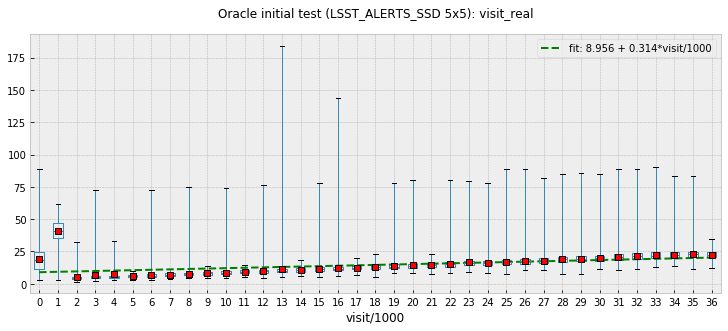

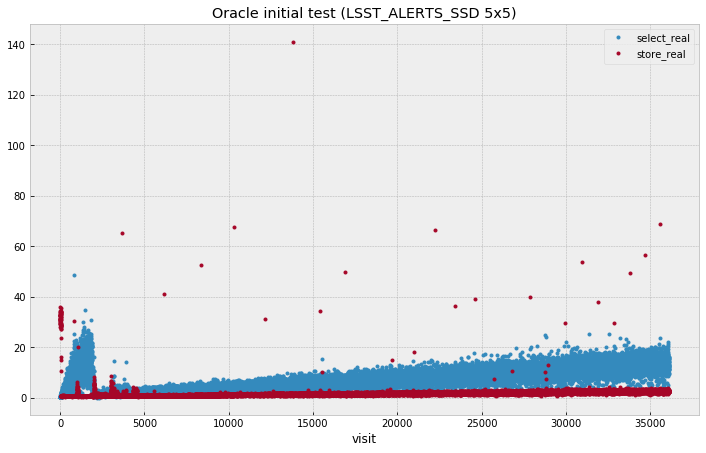

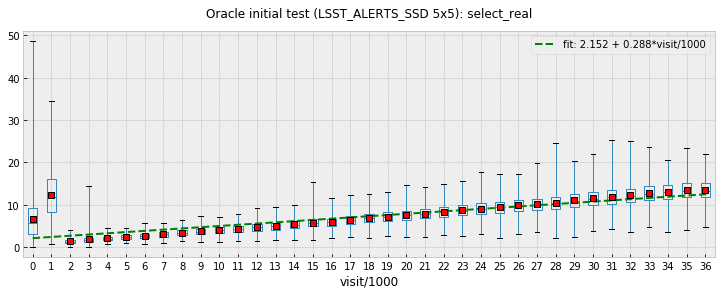

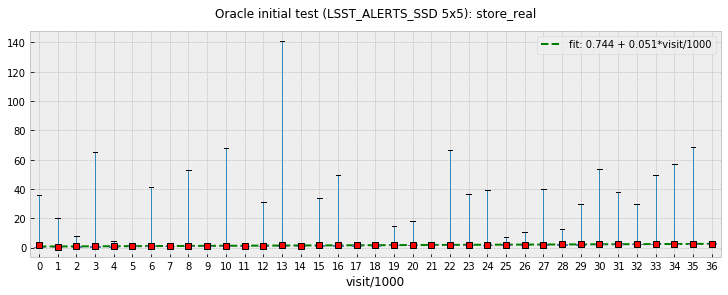

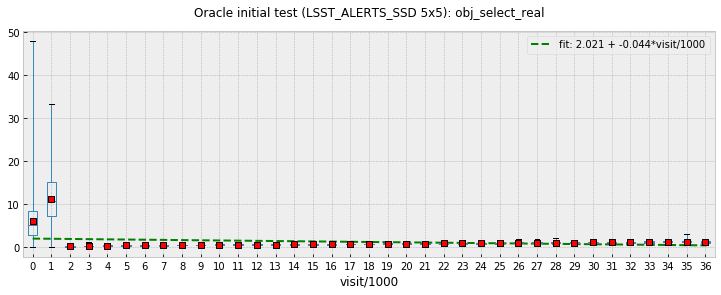

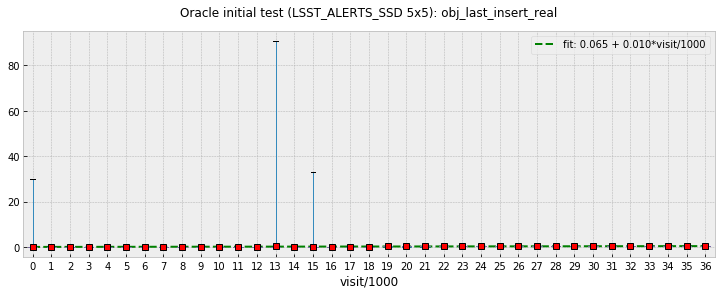

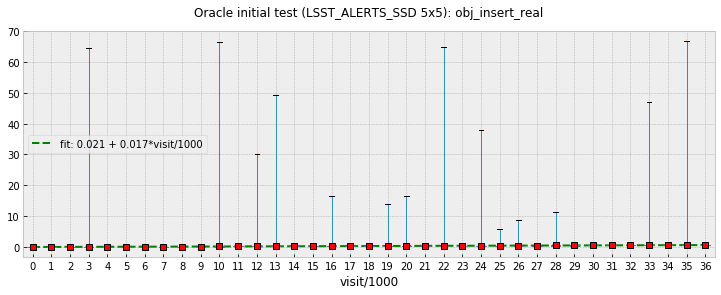

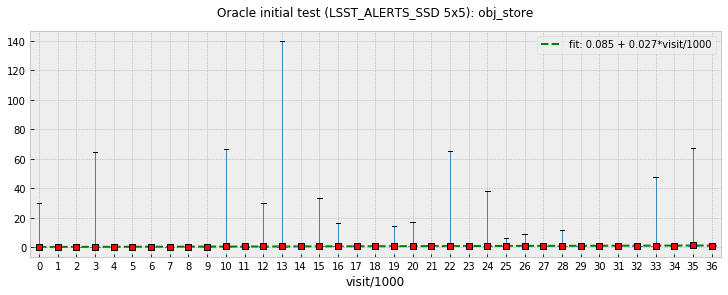

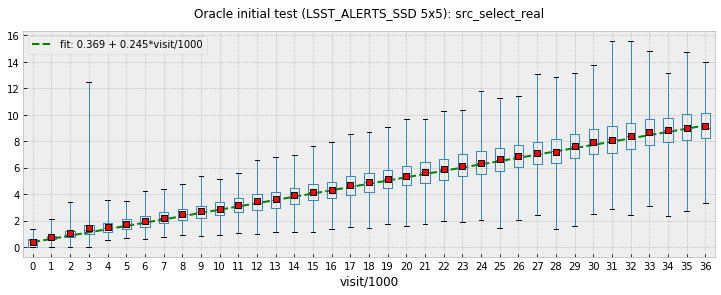

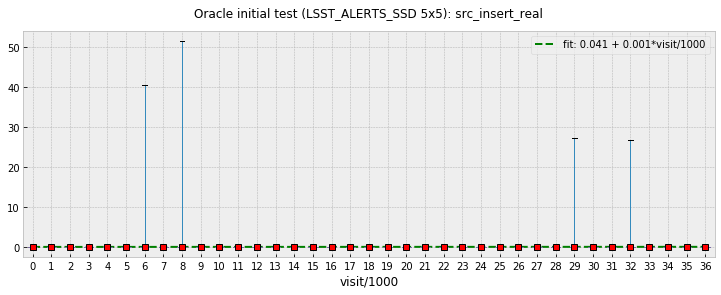

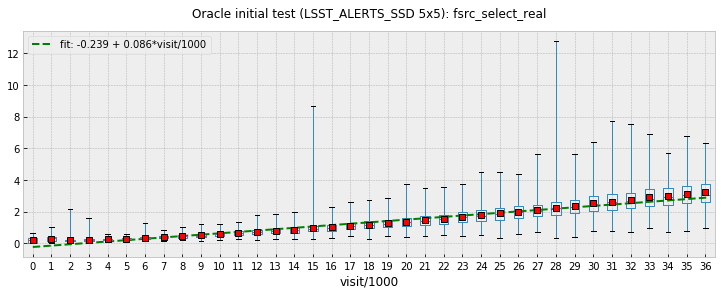

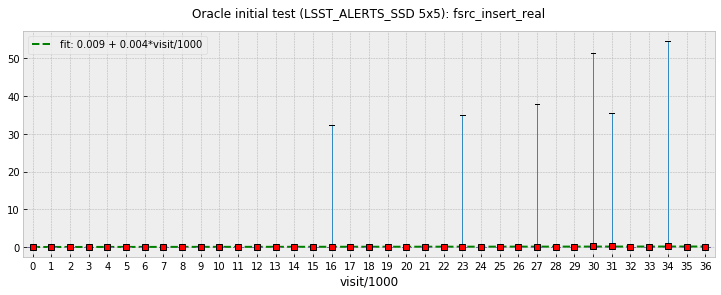

In [6]:
csv = "data/dm-14712-oracle-ssd-5x5-3.csv.gz"
title = "Oracle initial test (LSST_ALERTS_SSD 5x5)"
ds = plots.do_plots(csv, title, bin=1000, filter_count=True, bad_visits=[1073])
ds = plots.do_plots_all(csv, title, bin=1000, filter_count=True, plots=all_plots)  

## Switching to 15x15 tiling

This is the first attempt, test was moved to verification farm, using single node.

Log is in `dm-14712-oracle-ssd-15x15-0.log.gz`:
```
2018-06-28 14:09:15,377 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-06-28 14:09:15,379 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-06-28 14:09:15,379 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-06-28 14:09:15,380 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-06-28 14:09:15,380 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-06-28 14:09:15,380 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-06-28 14:09:15,381 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-06-28 14:09:15,381 [INFO] lsst.l1dbproto.l1db:     schema_file: /project/salnikov/l1dbproto/data/l1db-schema.yaml
2018-06-28 14:09:15,381 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: data/l1db-schema-extra-oracle.yaml
2018-06-28 14:09:15,381 [INFO] lsst.l1dbproto.l1db:     column_map: /project/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-06-28 14:09:15,381 [INFO] lsst.l1dbproto.l1db:     schema prefix: X3_
2018-06-28 14:09:19,037 [INFO] ap_proto: Will divide FOV into 15x15 regions
2018-06-28 14:09:19,038 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-06-28 14:09:19,786 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-06-28 14:09:19,787 [INFO] ap_proto: lastSourceId: 0
2018-06-28 14:09:19,787 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-01 03:00:00
2018-06-28 14:29:42,537 [INFO] ap_proto: --- Finished processing visit 3, time: real=402.063 user=1.184 sys=4.284
...
2018-06-28 15:22:35,429 [INFO] ap_proto: +++ Start processing visit 4 at 2020-01-01 03:02:15
2018-06-28 15:56:39,337 [INFO] ap_proto: --- Finished processing visit 13, time: real=204.789 user=1.149 sys=4.235
...
2018-06-28 16:21:20,679 [INFO] ap_proto: +++ Start processing visit 14 at 2020-01-01 03:09:45
2018-06-28 18:36:32,139 [INFO] ap_proto: --- Finished processing visit 113, time: real=15.392 user=1.165 sys=4.498
...
2018-06-28 18:37:39,765 [INFO] ap_proto: +++ Start processing visit 114 at 2020-01-01 04:24:45
2018-06-29 06:09:47,850 [INFO] ap_proto: --- Finished processing visit 5113, time: real=6.568 user=1.269 sys=5.350
...
2018-06-29 16:25:36,692 [INFO] ap_proto: +++ Start processing visit 5114 at 2020-01-07 20:54:45
2018-06-29 16:26:23,336 [INFO] ap_proto: --- Finished processing visit 5118, time: real=6.315 user=1.198 sys=5.195
```

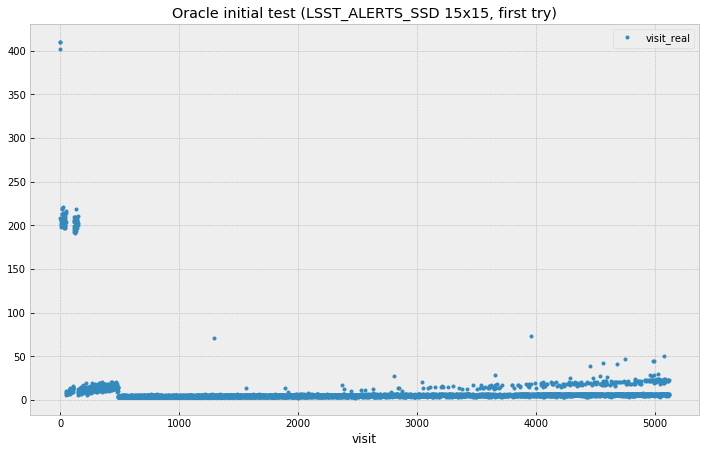

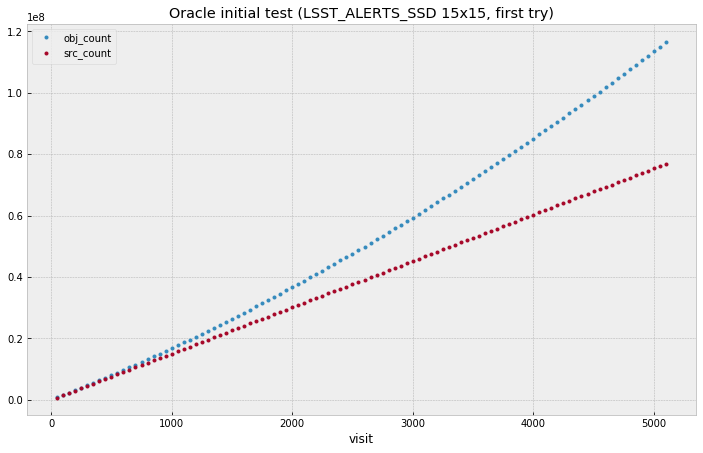

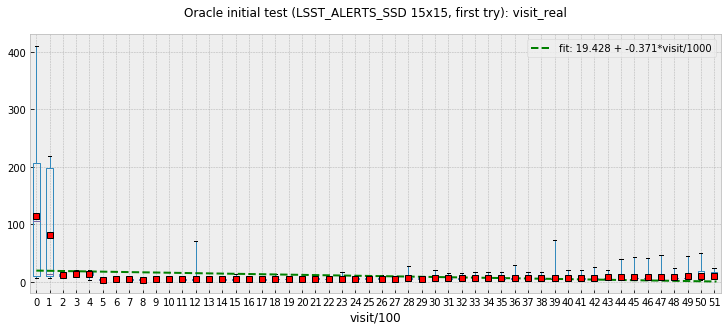

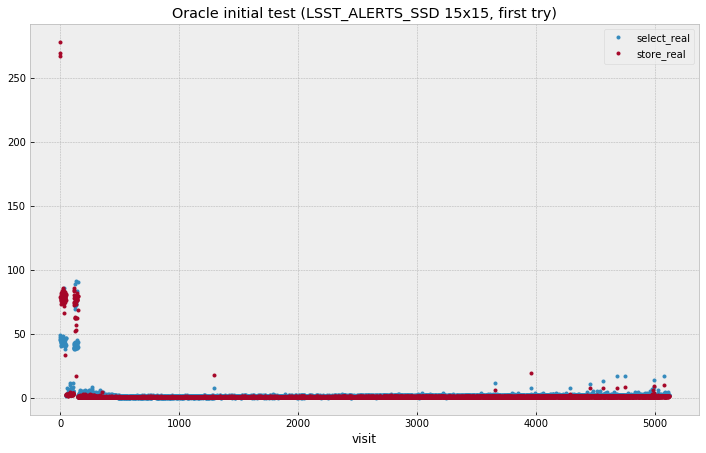

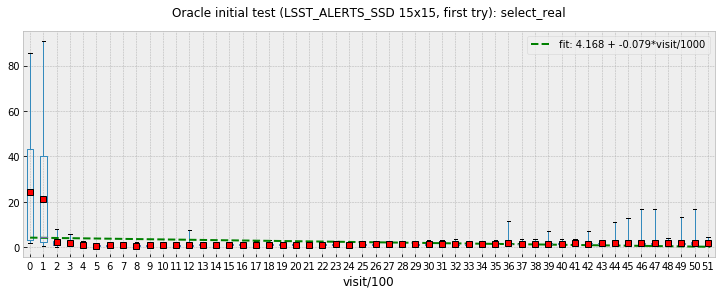

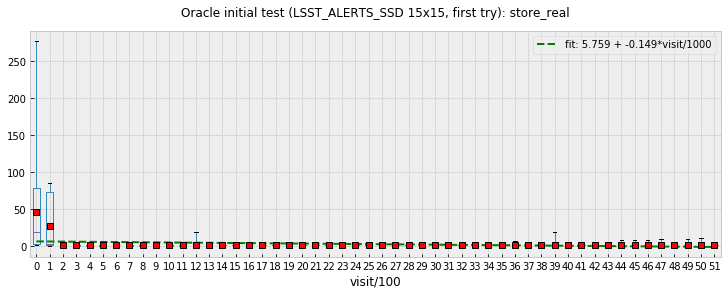

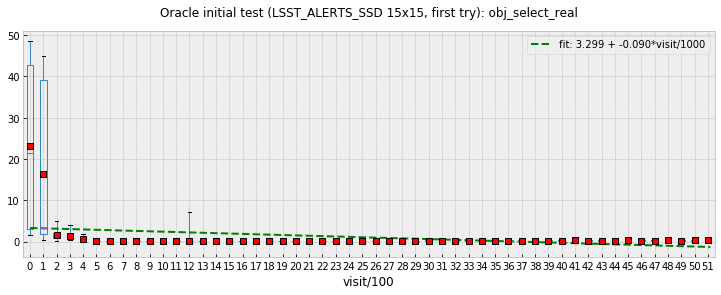

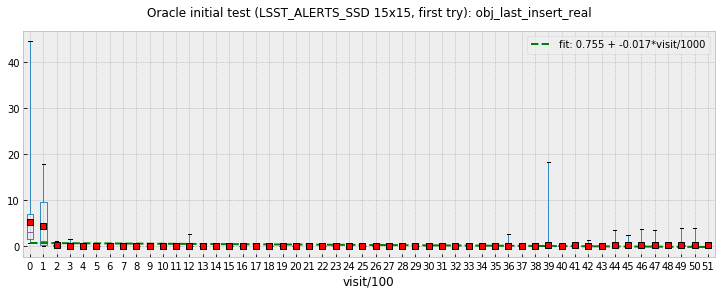

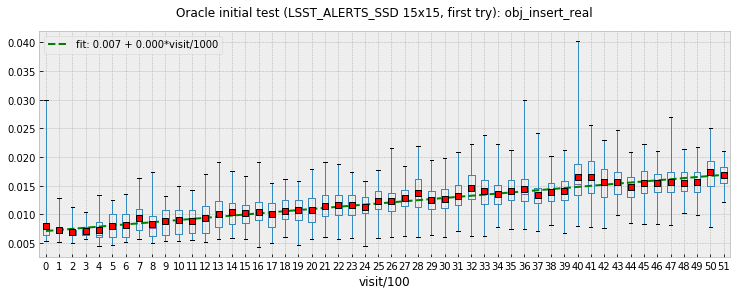

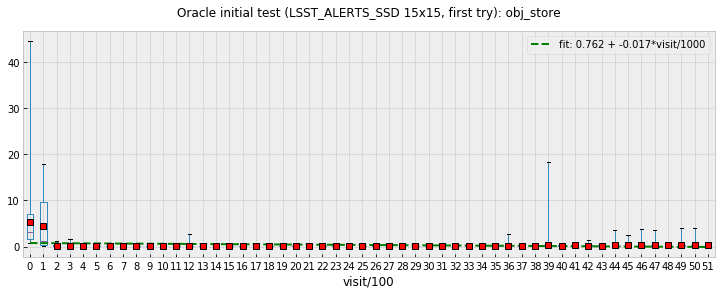

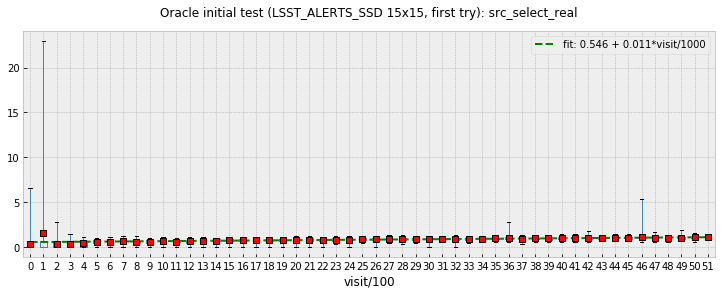

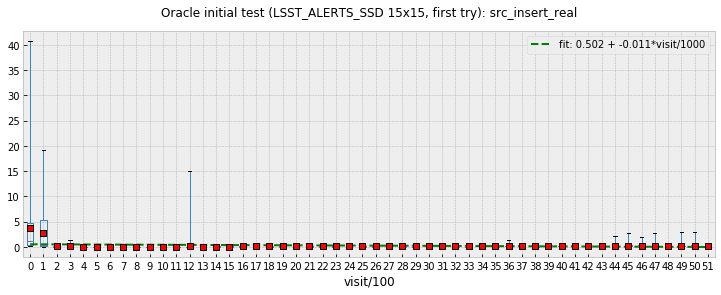

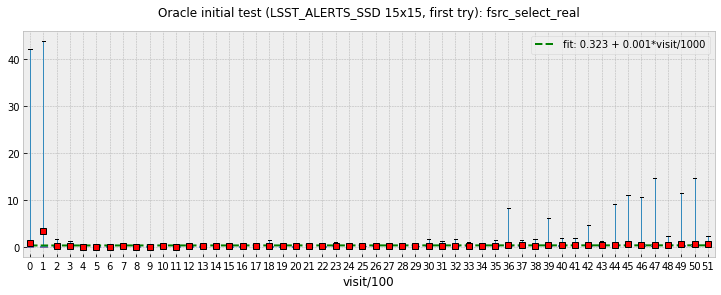

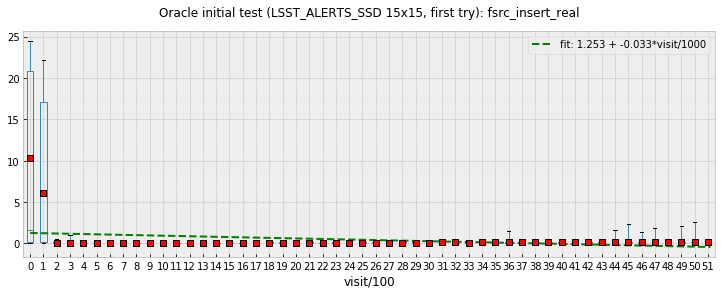

In [7]:
csv = "data/dm-14712-oracle-ssd-15x15-0.csv.gz"
title = "Oracle initial test (LSST_ALERTS_SSD 15x15, first try)"
ds = plots.do_plots(csv, title, bin=100, filter_count=True, bad_visits=[1073])
ds = plots.do_plots_all(csv, title, bin=100, filter_count=True, plots=all_plots)  

## 15x15 without schema discovery

For some reason reading metadata from database was problematic, all those spikes above are apparently due to that. Avoiding reading schema from database by justbuilding the same schema as one we use to create tables.

Log is in `dm-14712-oracle-ssd-15x15-1.log.gz`:
```
2018-06-29 16:47:46,734 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-06-29 16:47:46,736 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-06-29 16:47:46,736 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-06-29 16:47:46,737 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-06-29 16:47:46,737 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-06-29 16:47:46,737 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-06-29 16:47:46,737 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-06-29 16:47:46,738 [INFO] lsst.l1dbproto.l1db:     schema_file: /project/salnikov/l1dbproto/data/l1db-schema.yaml
2018-06-29 16:47:46,738 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: data/l1db-schema-extra-oracle.yaml
2018-06-29 16:47:46,738 [INFO] lsst.l1dbproto.l1db:     column_map: /project/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-06-29 16:47:46,738 [INFO] lsst.l1dbproto.l1db:     schema prefix: X3_
2018-06-29 16:47:47,284 [INFO] ap_proto: Will divide FOV into 15x15 regions
2018-06-29 16:47:47,287 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-06-29 16:47:48,070 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-06-29 16:47:48,070 [INFO] ap_proto: lastSourceId: 0
2018-06-29 16:47:48,070 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-01 03:00:00
2018-06-30 04:36:24,074 [INFO] ap_proto: --- Finished processing visit 5000, time: real=105.831 user=1.294 sys=5.139
```


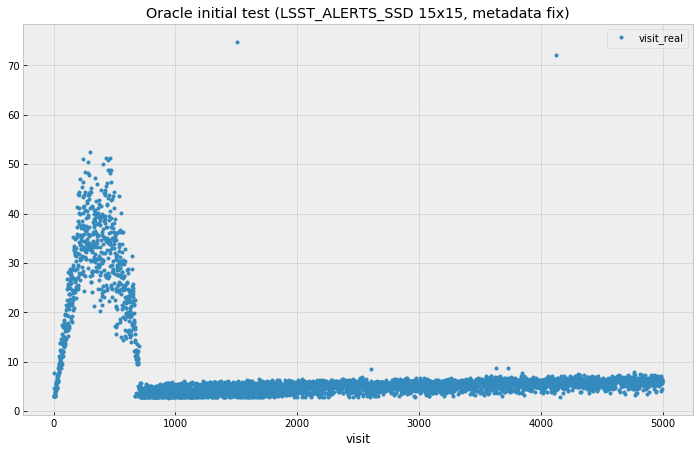

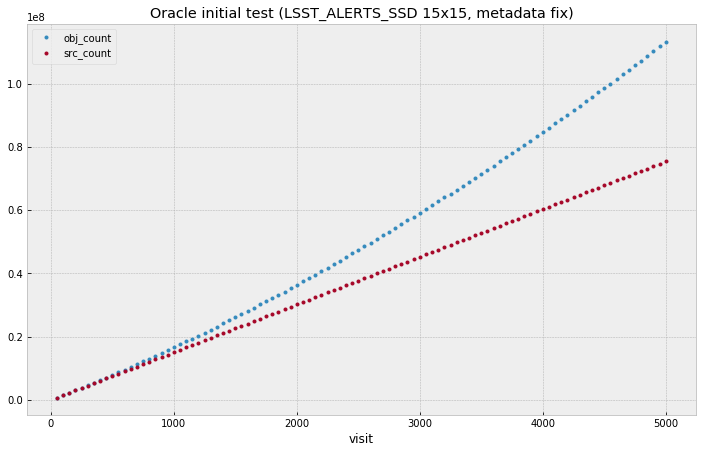

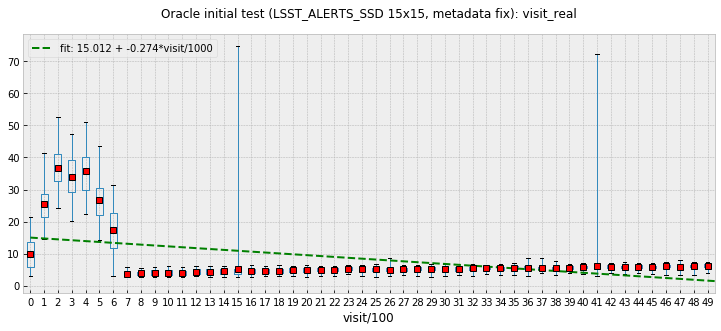

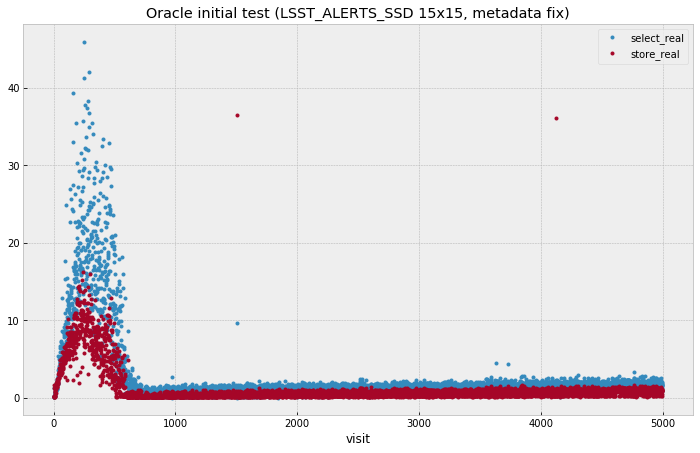

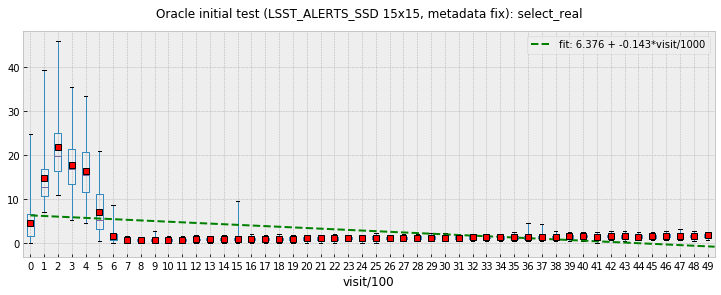

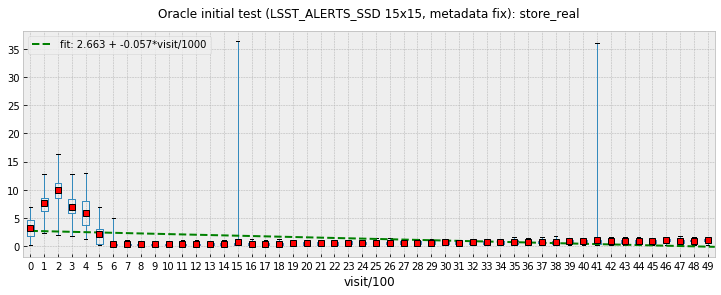

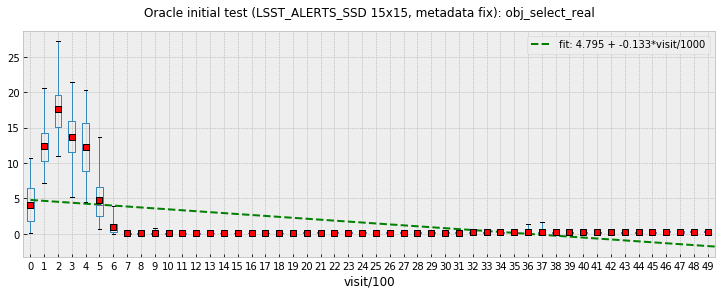

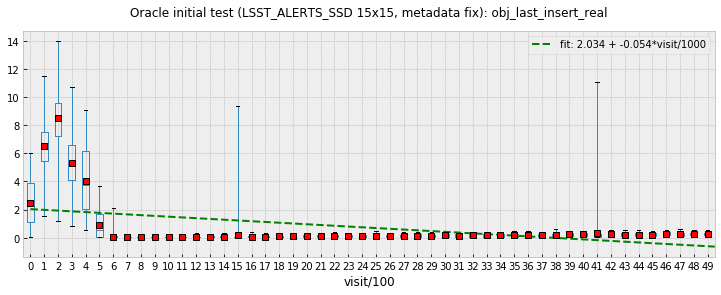

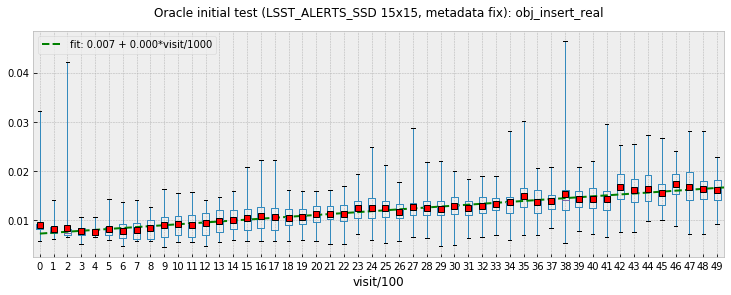

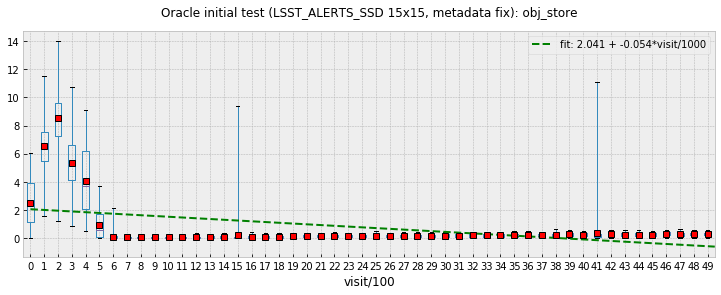

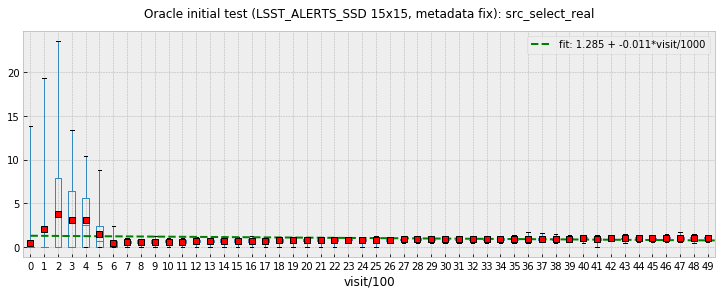

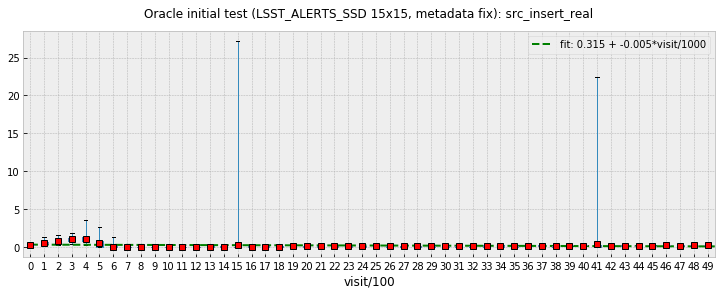

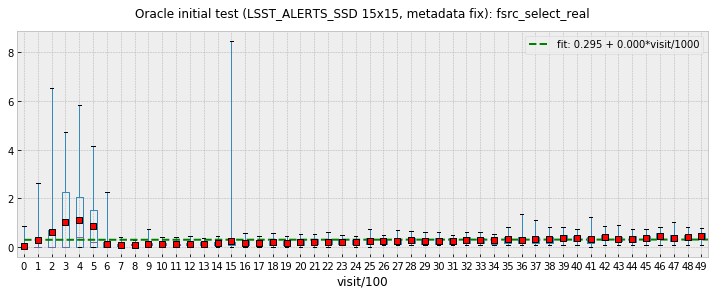

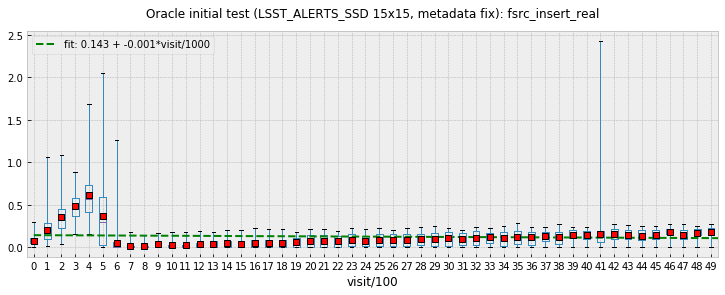

In [8]:
csv = "data/dm-14712-oracle-ssd-15x15-1.csv.gz"
title = "Oracle initial test (LSST_ALERTS_SSD 15x15, metadata fix)"
ds = plots.do_plots(csv, title, bin=100, filter_count=True)
ds = plots.do_plots_all(csv, title, bin=100, filter_count=True, plots=all_plots)

One very interesting thing about these plots - performance is not great initially but it improves at some point very significantly.

For this test I also have gathered some info from graphana monitoring, plots looks quite interesting (times are Pacific, there is 2h offset from times in the log).

![Node load](data/dm-14712-oracle-ssd-15x15-1-graphana-load.png "Node load")
![Network inbound traffic](data/dm-14712-oracle-ssd-15x15-1-graphana-net-in.png "Network inbound traffic")
![Network outbound traffic](data/dm-14712-oracle-ssd-15x15-1-graphana-net-out.png "Network outbound traffic")

There is a correlation beween timing and graphana plots which looks reasonable - slow timing corresponds to low IO and low load.

## Re-run 15x15 test on SSD with metadata fix

Practically same as previous, wanted to re-run it to see if this peculiar ramp-up effect persists.

Log in `dm-14712-oracle-ssd-15x15-2.log.gz`:
```
2018-06-30 20:32:42,791 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-06-30 20:32:42,793 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-06-30 20:32:42,794 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-06-30 20:32:42,795 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-06-30 20:32:42,795 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-06-30 20:32:42,795 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-06-30 20:32:42,796 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-06-30 20:32:42,796 [INFO] lsst.l1dbproto.l1db:     schema_file: /project/salnikov/l1dbproto/data/l1db-schema.yaml
2018-06-30 20:32:42,796 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: data/l1db-schema-extra-oracle.yaml
2018-06-30 20:32:42,796 [INFO] lsst.l1dbproto.l1db:     column_map: /project/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-06-30 20:32:42,796 [INFO] lsst.l1dbproto.l1db:     schema prefix: X6_
2018-06-30 20:32:48,266 [INFO] ap_proto: Will divide FOV into 15x15 regions
2018-06-30 20:32:48,266 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-06-30 20:32:54,124 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-06-30 20:32:54,124 [INFO] ap_proto: lastSourceId: 0
2018-06-30 20:32:54,125 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-01 03:00:00
2018-07-01 18:16:35,798 [INFO] ap_proto: --- Finished processing visit 10000, time: real=35.696 user=1.312 sys=5.266
```

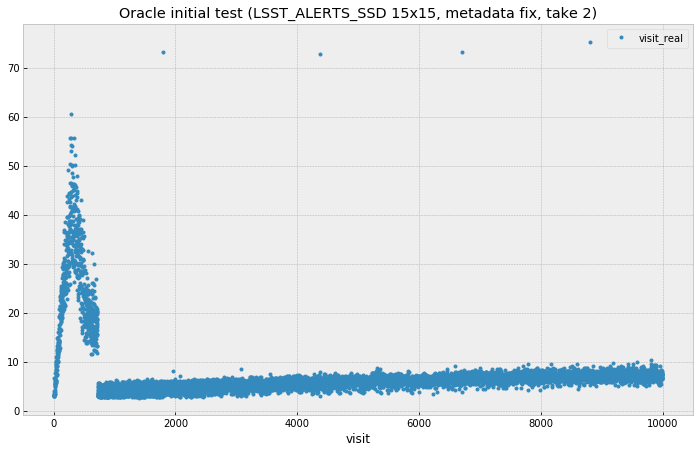

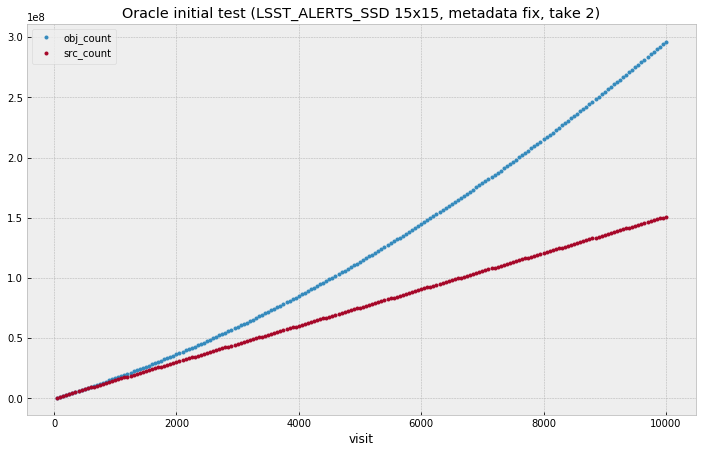

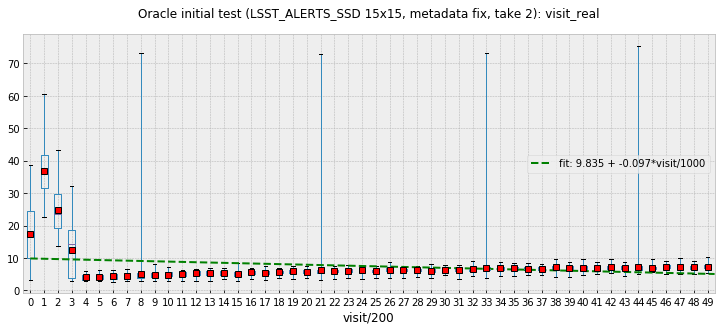

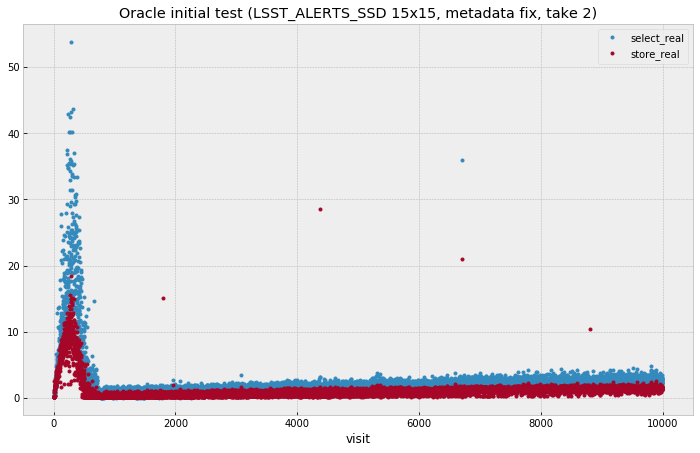

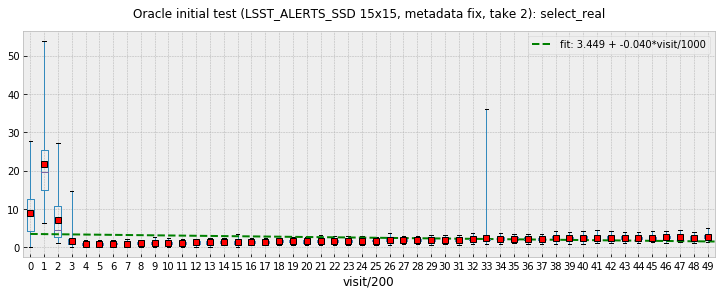

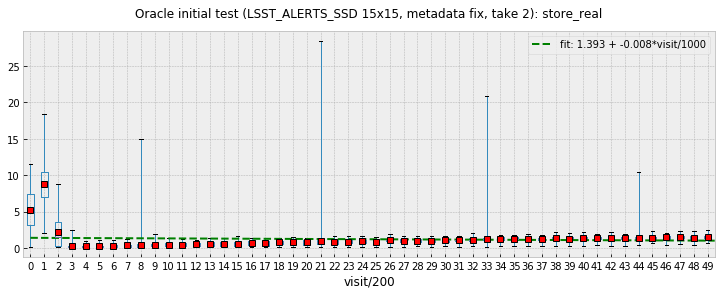

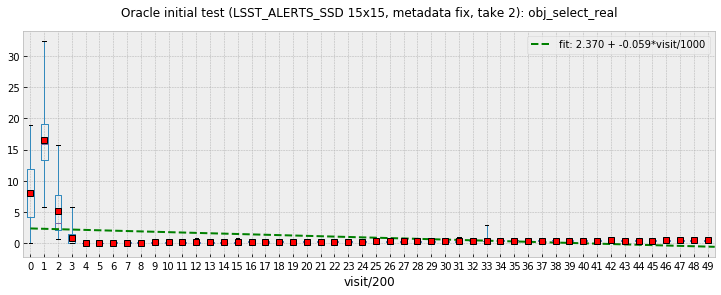

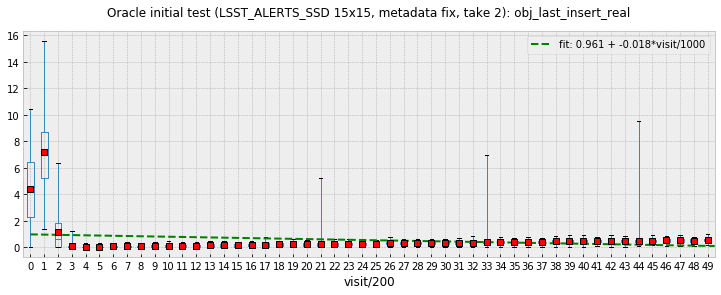

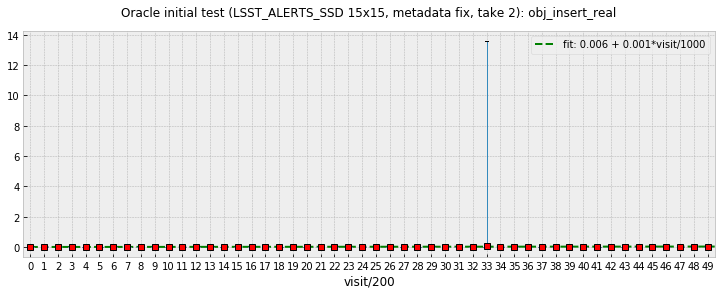

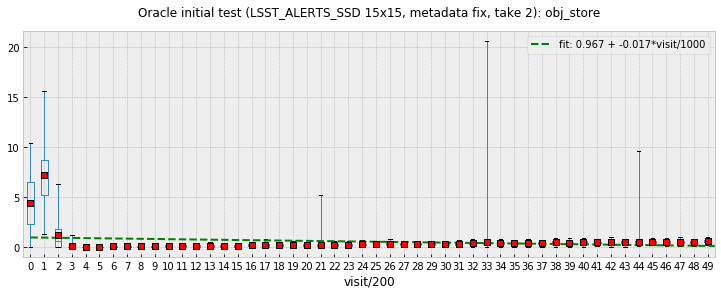

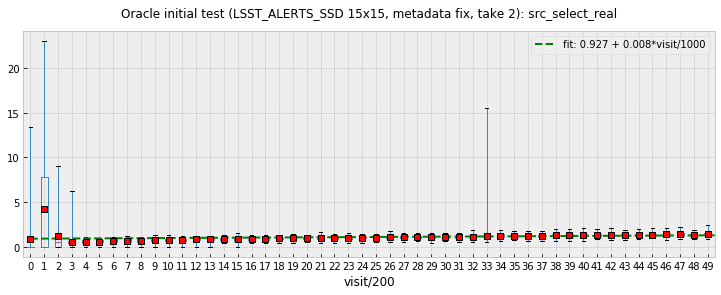

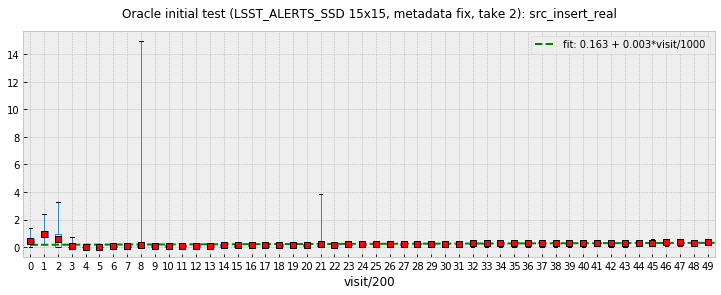

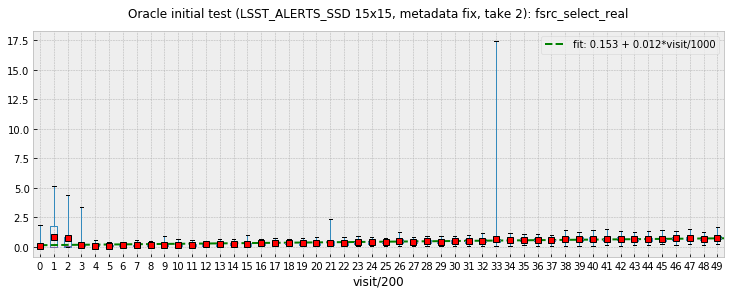

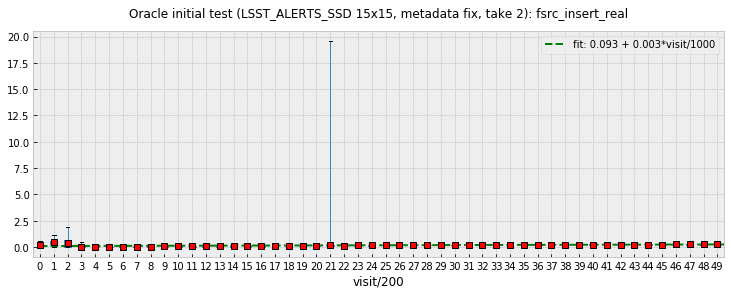

In [9]:
csv = "data/dm-14712-oracle-ssd-15x15-2.csv.gz"
title = "Oracle initial test (LSST_ALERTS_SSD 15x15, metadata fix, take 2)"
ds = plots.do_plots(csv, title, bin=200, filter_count=True)
ds = plots.do_plots_all(csv, title, bin=200, filter_count=True, plots=all_plots)

Timing plots look ~about the same as for previous test, I'm not sure what that means and what is happening on Oracle side.

And here are graphana plots for this test (again time is Pacific on these plots):

![Node load](data/dm-14712-oracle-ssd-15x15-2-graphana-load.png "Node load")
![Network inbound traffic](data/dm-14712-oracle-ssd-15x15-2-graphana-net-in.png "Network inbound traffic")
![Network outbound traffic](data/dm-14712-oracle-ssd-15x15-2-graphana-net-out.png "Network outbound traffic")


## 15x15 test on spinning disks

Log is in `dm-14712-oracle-spin-15x15-1.log`:
```
2018-07-02 00:48:45,306 [INFO] lsst.l1dbproto.l1db: L1DB Configuration:
2018-07-02 00:48:45,307 [INFO] lsst.l1dbproto.l1db:     dia_object_index: last_object_table
2018-07-02 00:48:45,308 [INFO] lsst.l1dbproto.l1db:     dia_object_nightly: False
2018-07-02 00:48:45,308 [INFO] lsst.l1dbproto.l1db:     read_sources_months: 12
2018-07-02 00:48:45,308 [INFO] lsst.l1dbproto.l1db:     read_forced_sources_months: 6
2018-07-02 00:48:45,308 [INFO] lsst.l1dbproto.l1db:     dia_object_columns: ['diaObjectId', 'lastNonForcedSource', 'ra', 'decl', 'raSigma', 'declSigma', 'ra_decl_Cov', 'pixelId']
2018-07-02 00:48:45,309 [INFO] lsst.l1dbproto.l1db:     object_last_replace: True
2018-07-02 00:48:45,309 [INFO] lsst.l1dbproto.l1db:     schema_file: /project/salnikov/l1dbproto/data/l1db-schema.yaml
2018-07-02 00:48:45,309 [INFO] lsst.l1dbproto.l1db:     extra_schema_file: data/l1db-schema-extra-oracle.yaml
2018-07-02 00:48:45,309 [INFO] lsst.l1dbproto.l1db:     column_map: /project/salnikov/l1dbproto/data/l1db-afw-map.yaml
2018-07-02 00:48:45,309 [INFO] lsst.l1dbproto.l1db:     schema prefix: XS_
2018-07-02 00:48:46,949 [INFO] ap_proto: Will divide FOV into 15x15 regions
2018-07-02 00:48:46,949 [INFO] ap_proto: Start loading variable sources from 'var_sources.npy'
2018-07-02 00:48:48,532 [INFO] ap_proto: Finished loading variable sources, count = 21438735
2018-07-02 00:48:48,533 [INFO] ap_proto: lastSourceId: 0
2018-07-02 00:48:48,533 [INFO] ap_proto: +++ Start processing visit 1 at 2020-01-01 03:00:00
...
2018-07-02 14:36:37,894 [INFO] ap_proto: --- Finished processing visit 765, time: real=141.826 user=1.176 sys=4.223

2018-07-02 17:16:32,068 [INFO] ap_proto: +++ Start processing visit 766 at 2020-01-02 02:33:45
...
2018-07-02 18:32:36,588 [INFO] ap_proto: --- Finished processing visit 1765, time: real=4.509 user=1.250 sys=4.971

2018-07-03 01:15:58,052 [INFO] ap_proto: +++ Start processing visit 1766 at 2020-01-03 05:03:45
...
2018-07-03 10:13:55,403 [INFO] ap_proto: --- Finished processing visit 5751, time: real=6.771 user=1.141 sys=5.099
```

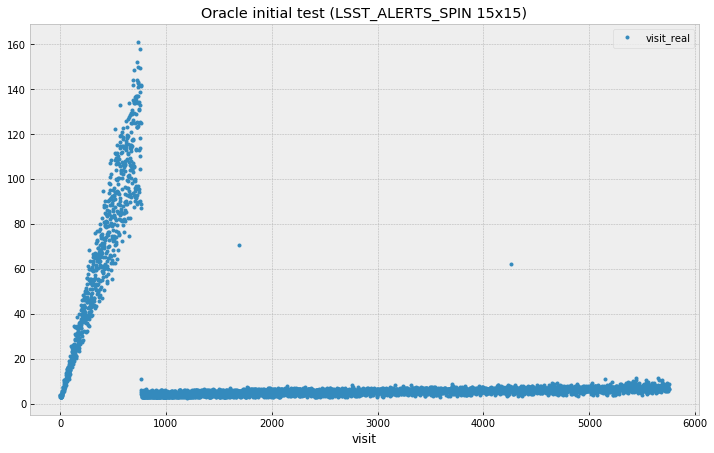

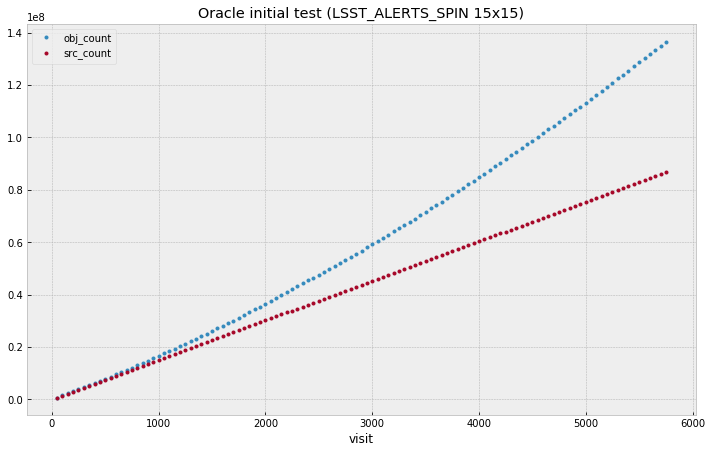

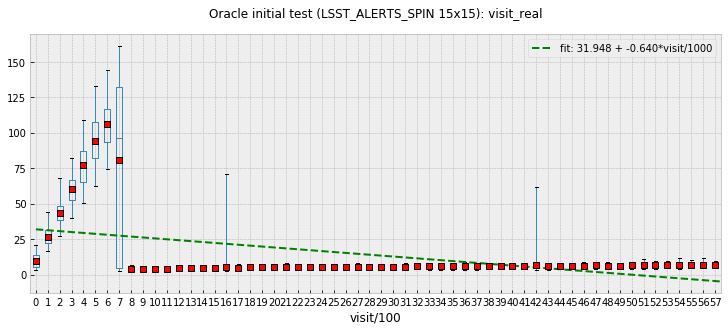

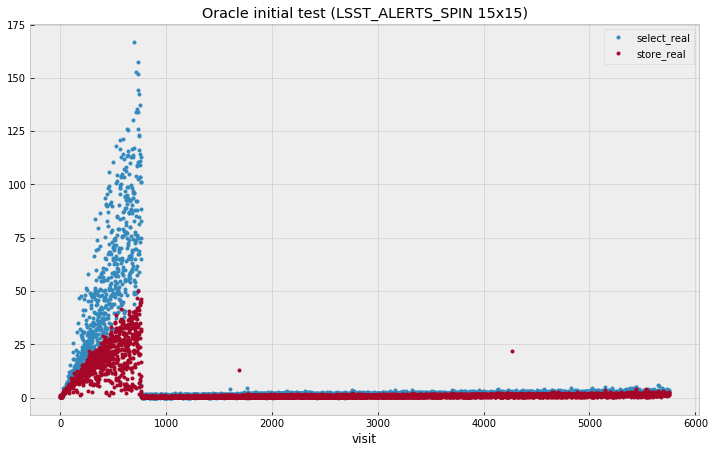

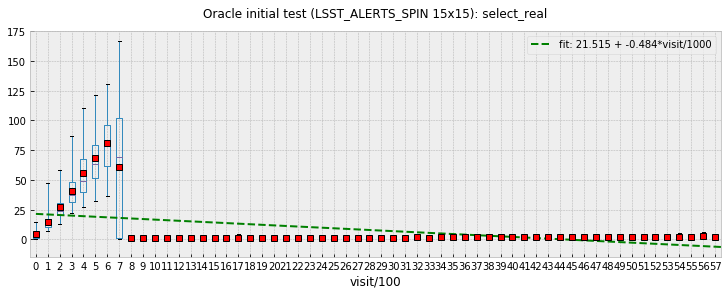

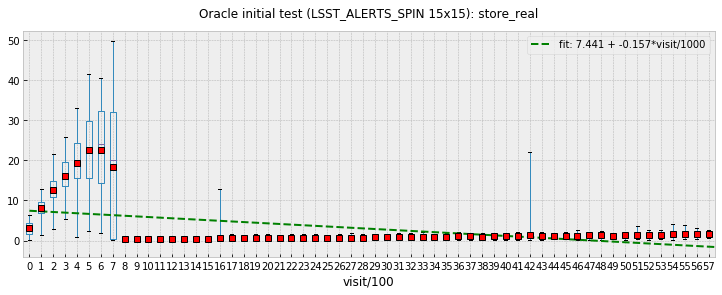

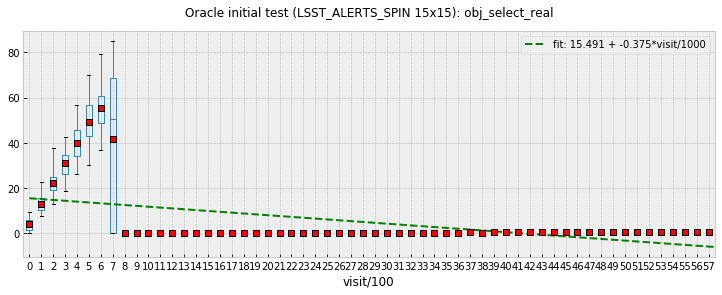

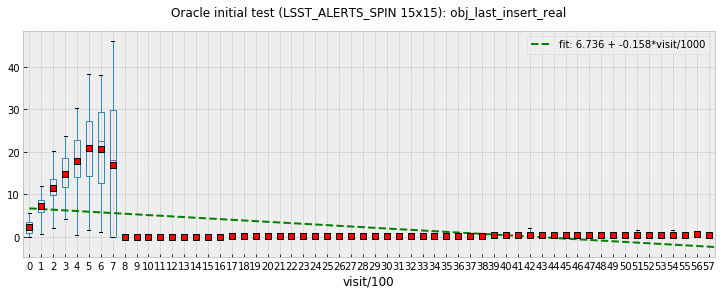

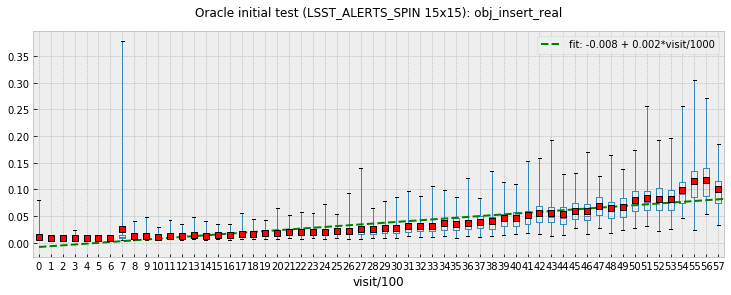

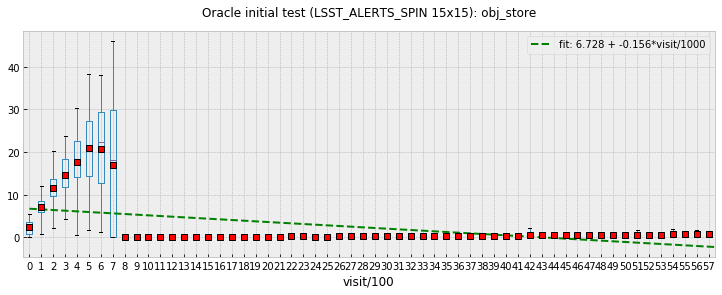

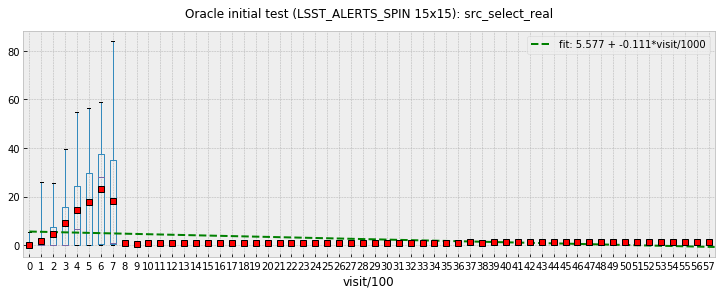

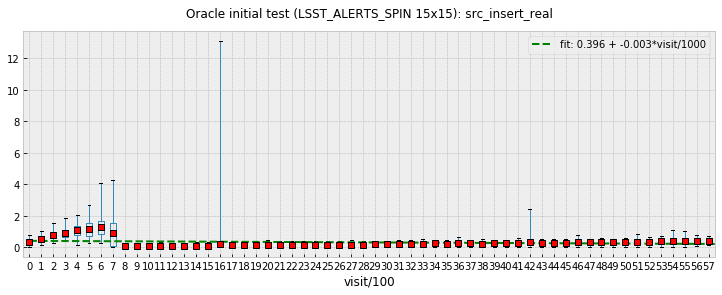

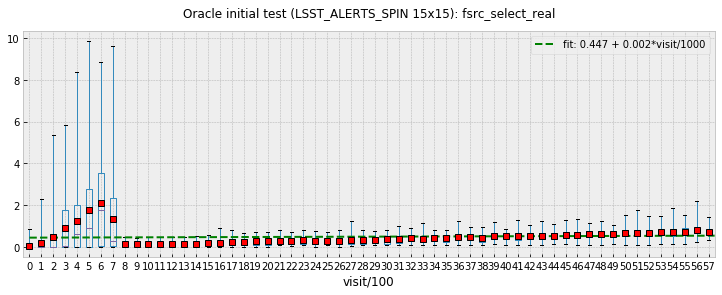

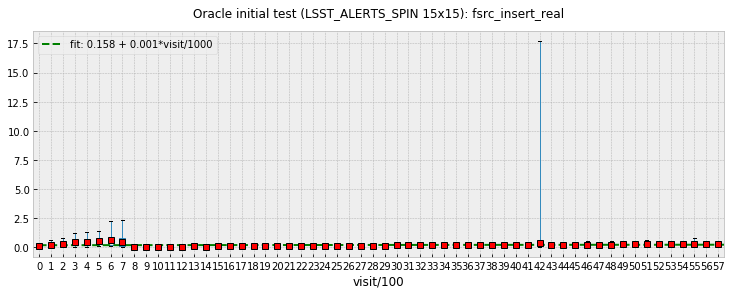

In [3]:
csv = "data/dm-14712-oracle-spin-15x15-1.csv.gz"
title = "Oracle initial test (LSST_ALERTS_SPIN 15x15)"
ds = plots.do_plots(csv, title, bin=100, filter_count=True)
ds = plots.do_plots_all(csv, title, bin=100, filter_count=True, plots=all_plots)

And corresponding graphana plots (time is PAcific on these plots)

![Node load](data/dm-14712-oracle-spin-15x15-1-graphana-load.png "Node load")
![Network outbound traffic](data/dm-14712-oracle-spin-15x15-1-graphana-net-out.png "Network outbound traffic")
